# Predict test data set

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# batch_size = 32
#image_size = 256
target_size = (256,256)
input_shape = (256, 256, 3)

# Your image data generator
test_datagen = ImageDataGenerator(rescale = 1.00 / 255.0)
test_dir = ''
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = target_size,
    batch_size = 1,
    class_mode='categorical'
)

Found 359 images belonging to 36 classes.


In [3]:


# batch_size = 32
#image_size = 256
target_size = (256,256)
input_shape = (256, 256, 3)

# Your image data generator
test_datagen = ImageDataGenerator(rescale = 1.00 / 255.0)
test_dir = ''
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = target_size,
    batch_size = 1,
    class_mode='categorical'
)
print('test_generator image shape: ',test_generator.image_shape)
print('test_generator OK')

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="models/q_model2.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('expected input Shape:', input_details[0]['shape'])
# input details:  [{'name': 'serving_default_conv2d_10_input:0', 'index': 0, 'shape': array([  1, 256, 256,   3]), 'shape_signature': array([ -1, 256, 256,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
# output details:  [{'name': 'StatefulPartitionedCall:0', 'index': 22, 'shape': array([ 1, 36]), 'shape_signature': array([-1, 36]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

correct_predictions = 0
total_predictions = 0

for images, labels in test_generator:
  
  # reshape images if necessary, convert to correct type
  print(images)
  images = np.array(images, dtype=np.float32)
  print(images)

  interpreter.set_tensor(input_details[0]['index'], images)
  interpreter.invoke()
  
  tflite_predictions = interpreter.get_tensor(output_details[0]['index'])
  # print('tflite_predictinos: ', tflite_predictions)

  # now compare tflite_predictions to labels
  # you would write this comparison code based on your specific use case
  # for a binary classification, it might be:
  tflite_predictions = (tflite_predictions > 0.5).astype(int)
  predicted_class_index = np.argmax(tflite_predictions)
  correct_class_index = np.argmax(labels)

  print('preicted index: ', predicted_class_index)
  print('correct index: ', correct_class_index)
  

  if(predicted_class_index == correct_class_index):
    correct_predictions += 1

  total_predictions += 1
  
  # print('correct_predictions: ', correct_predictions)
  print('total_predictions: ', total_predictions)
  print("Current Accuracy: ", correct_predictions / total_predictions)
  print('\n')
  

print("Total Accuracy: ", correct_predictions / total_predictions)

Found 359 images belonging to 36 classes.


test_generator image shape:  (256, 256, 3)
test_generator OK
expected input Shape: [  1 256 256   3]
[[[[0.37254903 0.2392157  0.12941177]
   [0.29803923 0.20000002 0.1137255 ]
   [0.37254903 0.2392157  0.12941177]
   ...
   [0.34901962 0.24705884 0.18039216]
   [0.3803922  0.25882354 0.1764706 ]
   [0.47450984 0.32941177 0.227451  ]]

  [[0.3803922  0.24313727 0.1254902 ]
   [0.31764707 0.21568629 0.1254902 ]
   [0.36078432 0.2392157  0.1254902 ]
   ...
   [0.3254902  0.23529413 0.16470589]
   [0.3921569  0.26666668 0.1764706 ]
   [0.45882356 0.32156864 0.23529413]]

  [[0.38431376 0.24705884 0.12156864]
   [0.30980393 0.20784315 0.11764707]
   [0.35686275 0.23529413 0.12156864]
   ...
   [0.32156864 0.23137257 0.16078432]
   [0.5058824  0.33333334 0.23529413]
   [0.49803925 0.35686275 0.2627451 ]]

  ...

  [[0.24313727 0.15686275 0.07450981]
   [0.2901961  0.18823531 0.09019608]
   [0.3647059  0.227451   0.10980393]
   ...
   [0.1254902  0.08235294 0.05882353]
   [0.34509805 0.26274

KeyboardInterrupt: 

# Predict One Image

preprocess: [[[[0.8627451  0.29019608 0.33333333]
   [0.8627451  0.29019608 0.33333333]
   [0.86666667 0.29411765 0.3372549 ]
   ...
   [0.56078431 0.16078431 0.14509804]
   [0.51764706 0.12156863 0.12156863]
   [0.52156863 0.1254902  0.12941176]]

  [[0.85882353 0.28627451 0.32941176]
   [0.85882353 0.28627451 0.32941176]
   [0.85882353 0.28627451 0.32941176]
   ...
   [0.50588235 0.11764706 0.11372549]
   [0.49411765 0.10980392 0.10980392]
   [0.52941176 0.14117647 0.13333333]]

  [[0.85490196 0.28235294 0.32941176]
   [0.85098039 0.27843137 0.32156863]
   [0.85490196 0.27843137 0.3254902 ]
   ...
   [0.44313725 0.09019608 0.09411765]
   [0.45490196 0.09803922 0.09803922]
   [0.50588235 0.1372549  0.11764706]]

  ...

  [[0.70980392 0.16862745 0.11764706]
   [0.71764706 0.17254902 0.10980392]
   [0.71372549 0.16470588 0.09803922]
   ...
   [0.70196078 0.67843137 0.59215686]
   [0.72156863 0.69411765 0.61568627]
   [0.74509804 0.72156863 0.63529412]]

  [[0.7254902  0.18823529 0.12156

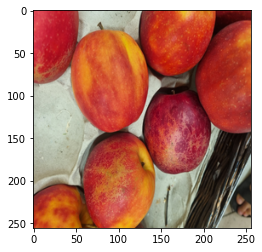

In [4]:
import numpy as np
import tensorflow as tf
from PIL import Image

batch_size = 32
#image_size = 256
target_size = (256,256)
input_shape = (256, 256, 3)

classes_list = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 
                'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 
                'kiwi', 'lemon', 'lettuce',  'mango', 'onion', 'orange',  'paprika', 
                'pear', 'peas', 'pineapple', 'pomegrante', 'potato', 'raddish', 'soy beans', 
                'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

# return image to numpy form
def preprocess_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)
    image = image.resize(target_size, Image.Resampling.LANCZOS)
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    plt.imshow(image) # plot the image
    
    return np.expand_dims(image_array, axis=0)  # Add batch dimension


# Select the image for prediction
imgpath_folder = ""
imgpath_folder += ""
imgpath = imgpath_folder+""
input_image = preprocess_image(imgpath)

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="models/quanted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Provide your input to the model.
input_shape = input_details[0]['shape']
print('preprocess:', preprocess_image(imgpath))
input_data = np.array(preprocess_image(imgpath), dtype=np.float32)
print('after: ',input_data)
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the model
interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(np.sum(output_data))
print(output_data)
index=np.argmax(output_data)
print(output_data[0][index])
print(index)
print(classes_list[index])
